In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_in=4
n_hid=15
n_out=7

S_in=zeros(n_in+1)
S_hid=zeros(n_hid)
S_out=zeros(n_out)

S_in[-1]=1

h_hid=zeros(n_hid)
h_out=zeros(n_out)

W_ih=2*rand(n_in+1,n_hid)-1
W_ho=2*rand(n_hid,n_out)-1
dW_ih=zeros((n_in+1,n_hid))
dW_ho=zeros((n_hid,n_out))

In [3]:
def f(x):
    return 1/(1+exp(-x))

def Df(x):
    y=f(x)
    return y*(1-y)

In [4]:
def feed(inp):
    S_in[:n_in]=inp

def forward():
    global h_hid, S_hid, h_out, S_out
    h_hid=S_in @ W_ih
    S_hid=f(h_hid)
    h_out=S_hid @ W_ho
    S_out=f(h_out)

def eval(inp):
    feed(inp)
    forward()
    return S_out

def diff(p):
    return pat[p,n_in:]-S_out

def error(p):
    return sum(diff(p)**2)/2

In [5]:
pat=array([
    [0,0,0,0,1,1,1,1,1,1,0], #0
    [0,0,0,1,0,1,1,0,0,0,0], #1
    [0,0,1,0,1,1,0,1,1,0,1], #2
    [0,0,1,1,1,1,1,1,0,0,1], #3
    [0,1,0,0,0,1,1,0,0,1,1], #4
    [0,1,0,1,1,0,1,1,0,1,1], #5
    [0,1,1,0,1,0,1,1,1,1,1], #6
    [0,1,1,1,1,1,1,0,0,0,0], #7
    [1,0,0,0,1,1,1,1,1,1,1], #8
    [1,0,0,1,1,1,1,1,0,1,1], #9
    [1,0,1,0,1,1,1,0,1,1,1], #A
    [1,0,1,1,0,0,1,1,1,1,1], #B
    [1,1,0,0,1,0,0,1,1,1,0], #C
    [1,1,0,1,0,1,1,1,1,0,1], #D
    [1,1,1,0,1,0,0,1,1,1,1], #E
    [1,1,1,1,1,0,0,0,1,1,1]  #F
])

In [6]:
def lcd(segments):
    pixels=[[1,2], [7,11], [19,23], [25,26],
              [16,20], [4,8], [13,14]]
    d=zeros(4*7)
    for s in range(7):
        if segments[s]:
            d[pixels[s]]=1
    imshow(d.reshape(7,4));

ints=[[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,0,1,1], 
 [0,1,0,0], [0,1,0,1], [0,1,1,0], [0,1,1,1], 
 [1,0,0,0], [1,0,0,1], [1,0,1,0], [1,0,1,1], 
 [1,1,0,0], [1,1,0,1], [1,1,1,0], [1,1,1,1]]

In [7]:
eta=0.5
epoch=0
Er=1
error_history=[]
p_num=pat.shape[0] # liczba wektorów uczących
# pats=array(range(p_num))

while (Er>0.001 and epoch<2000):
    Er=0
    dW_ih.fill(0)
    dW_ho.fill(0)
#     random.shuffle(pats)

    for p in range(p_num):
#         pats[:int(p_num/2)]:
        feed(pat[p,:n_in])
        forward()
        
        delta_out=Df(h_out)*diff(p)
        dW_ho+=outer(S_hid,delta_out)
        delta_hid=Df(h_hid)*(W_ho@delta_out)
        dW_ih+=outer(S_in,delta_hid)
        
        Er+=error(p)

    W_ih+=eta*dW_ih
    W_ho+=eta*dW_ho
    epoch+=1
    error_history.append(Er)
    
print("epoka: {}, błąd: {}".format(epoch, Er))

epoka: 2000, błąd: 1.0212301934338168


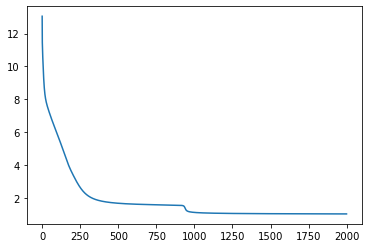

In [8]:
plot(error_history)

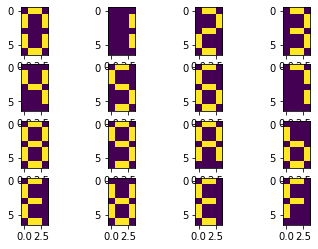

In [9]:
subplots(4,4)
plt=1
for i in ints:
    subplot(4,4,plt)
    lcd(eval(i)>0.5)
    plt+=1